<a href="https://colab.research.google.com/github/2303a52506/23CSBTB50/blob/main/Random_Forest_AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
df=pd.read_csv("/content/Churn_Modelling.csv")
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [4]:
df = pd.get_dummies(df, columns=['Geography','Gender'])

print(df)

       RowNumber  CustomerId    Surname  CreditScore   Age  Tenure    Balance  \
0              1    15634602   Hargrave          619  42.0       2       0.00   
1              2    15647311       Hill          608  41.0       1   83807.86   
2              3    15619304       Onio          502  42.0       8  159660.80   
3              4    15701354       Boni          699  39.0       1       0.00   
4              5    15737888   Mitchell          850  43.0       2  125510.82   
...          ...         ...        ...          ...   ...     ...        ...   
9997        9998    15584532        Liu          709  36.0       7       0.00   
9998        9999    15682355  Sabbatini          772  42.0       3   75075.31   
9999        9999    15682355  Sabbatini          772  42.0       3   75075.31   
10000      10000    15628319     Walker          792  28.0       4  130142.79   
10001      10000    15628319     Walker          792  28.0       4  130142.79   

       NumOfProducts  HasCr

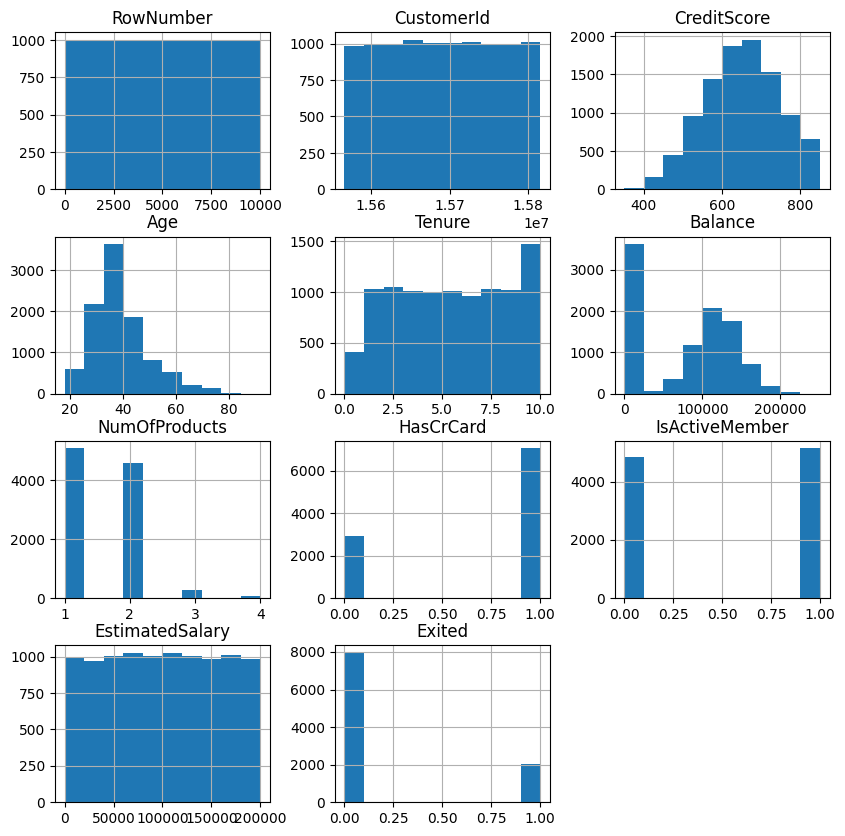

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

df.hist(figsize=(10, 10))
plt.show()


In [6]:
print(df.isnull().sum())

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Age                  1
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            1
IsActiveMember       1
EstimatedSalary      0
Exited               0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
Gender_Female        0
Gender_Male          0
dtype: int64


In [7]:
df.fillna({'HasCrCard': df['HasCrCard'].mode()[0]}, inplace=True)

# Example: Filling missing values in the 'IsActiveMember' column
df.fillna({'IsActiveMember': df['IsActiveMember'].mode()[0]}, inplace=True)

# Example: Filling missing values in the 'Age' column
df.fillna({'Age': df['Age'].mean()}, inplace=True)

In [8]:
df = df.drop(columns=['RowNumber', 'CustomerId','Surname'])

                   CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore           1.000000 -0.004038  0.000703  0.006390       0.012203   
Age                  -0.004038  1.000000 -0.010099  0.028320      -0.030666   
Tenure                0.000703 -0.010099  1.000000 -0.012282       0.013418   
Balance               0.006390  0.028320 -0.012282  1.000000      -0.304226   
NumOfProducts         0.012203 -0.030666  0.013418 -0.304226       1.000000   
HasCrCard            -0.005282 -0.011694  0.022514 -0.014803       0.003176   
IsActiveMember        0.025364  0.085649 -0.028250 -0.010169       0.009621   
EstimatedSalary      -0.001557 -0.007139  0.007830  0.012704       0.014290   
Exited               -0.026909  0.285314 -0.014117  0.118456      -0.047601   
Geography_France     -0.009260 -0.039445 -0.002950 -0.230964       0.000896   
Geography_Germany     0.005668  0.046939 -0.000667  0.400975      -0.010224   
Geography_Spain       0.004623 -0.001700  0.003928 -

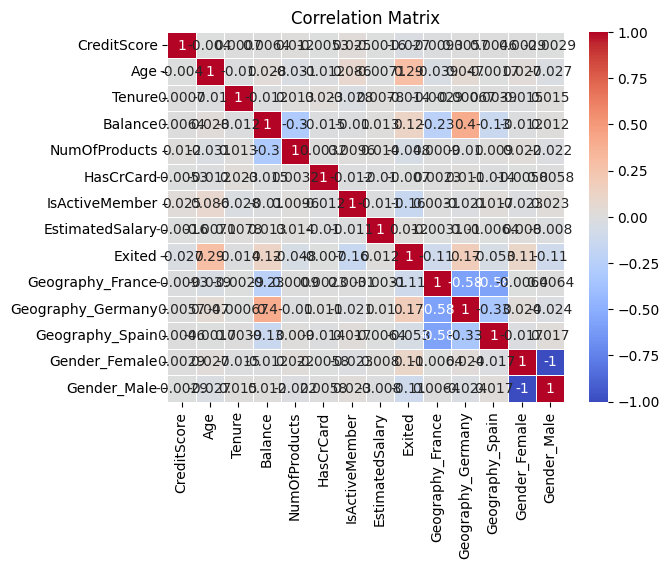

In [9]:
corr_matrix = df.corr()

# Print the correlation matrix
print(corr_matrix)

# Visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # or however many components you need
principal_components = pca.fit_transform(df[['Geography_France', 'Geography_Germany', 'Geography_Spain']])
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df = pd.concat([df, df_pca], axis=1)
df = df.drop(columns=['Geography_France', 'Geography_Germany', 'Geography_Spain'])


In [11]:
df['Balance_Product_Interaction'] = df['Balance'] * df['NumOfProducts']
df=df.drop(columns=['Gender_Female','Balance','NumOfProducts'])

In [12]:
print(df.columns)

Index(['CreditScore', 'Age', 'Tenure', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Gender_Male', 'PC1', 'PC2',
       'Balance_Product_Interaction'],
      dtype='object')


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(df)
print(df[:1])

[[-0.32646533  0.29350036 -1.04172763  0.64600011  0.97044262  0.02200754
   1.97680366 -1.09596732  0.99733867 -0.00926827 -1.02249251]]


In [14]:
from sklearn.model_selection import train_test_split
# Assume last column is the target
X = df[:, :-1]  # Features
y = df[:, -1]   # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

MAE: 0.7478927331063087
MSE: 0.8122263421152398
R-squared: 0.1735562869675371


In [18]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print(scores)

[0.17407649 0.17296327 0.19562182 0.17530572 0.19296203]


In [19]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']

In [20]:
model = joblib.load('model.pkl')

In [21]:
new_data = [[-0.32646533 , 0.29350036, -1.04172763 , 0.64600011 , 0.02200754,1.97680366, -1.09596732, -0.99733867 ,-0.00926827, -1.02249251]]
prediction = model.predict(new_data)
print(prediction)

[0.30317604]
